# Lagrange Polynomial

In [110]:
from sympy import *
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
init_printing()

For a set of nodes X =$\{x_k\}_{k=1}^{n}$ We define the Lagrange Polynomial as

$$
    \ell_i(x) := \prod_{j=1}^{n} \frac{x - x_j}{x_i - x_j} \ \forall \ j \neq i
$$

Now, for any function $g$,
$$
    p(x) := \sum_{i=1}^{n} g(x_i)\ell(x)
$$

In [86]:
x0, x1, x2, x3, x = symbols("x0 x1 x2 x3 x")
X = np.array([x0, x1, x2, x3])
Y = X ** 2

In [59]:
def lagrange_mult(i, x, X):
    """
    Compute the Langrange multiplication procedure
    """
    polform = 1
    xi = X[i]
    for xj in X:
        if xi != xj:
            polform *= (x - xj) / (xi - xj)
    return polform

def lagrange_pol(X, f):
    """
    Compute the lagrange polynomial for a given
    set of nodes and a vectorized numpy function
    """
    Y = np.vectorize(f)(X)
    range_nnodes = range(len(X))
    
    return lambda x: np.sum(Y * np.array([lagrange_mult(i, x, X)
                                          for i in range_nnodes]))

In [96]:
lagrange_symbol = lagrange_pol(X, lambda x: x**2)
for xi in X:
    display(lagrange_symbol(xi))

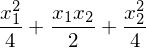

In [99]:
simplify(lagrange_symbol((x1 + x2) / 2))

In [101]:
simplify(lagrange_symbol(x))

In [103]:
simplify(lagrange_symbol(x3 + 1))

In [104]:
simplify(lagrange_symbol(x0 - 1))

## Numerical Analysis over the function $g = x ^ 2$

In [146]:
Xrange = np.arange(-3, 4, 1)
Xcont = np.arange(-4, 4, 0.1)

gfunc= np.vectorize(lambda x: x ** 2)
lagr = np.vectorize(lagrange_pol(Xrange, gfunc))

gfunc2= np.vectorize(lambda x: np.sin(x))
lagr2 = np.vectorize(lagrange_pol(Xrange, gfunc2))

gfunc3= np.vectorize(lambda x: np.sin(x ** 2) / (np.abs(x) +1))
lagr3 = np.vectorize(lagrange_pol(Xrange, gfunc3))

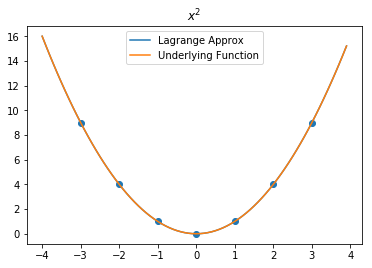

In [147]:
plt.scatter(Xrange, gfunc(Xrange))
plt.title("$x^2$")
plt.plot(Xcont, lagr(Xcont), label="Lagrange Approx")
plt.plot(Xcont, gfunc(Xcont), label="Underlying Function")
plt.legend()
plt.show()

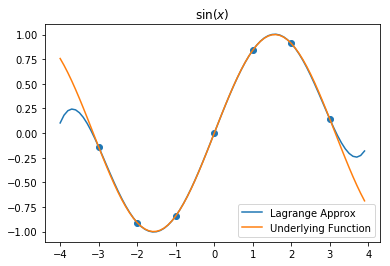

In [148]:
plt.scatter(Xrange, gfunc2(Xrange))
plt.title(r"$\sin(x)$")
plt.plot(Xcont, lagr2(Xcont), label="Lagrange Approx")
plt.plot(Xcont, gfunc2(Xcont), label="Underlying Function")
plt.legend()
plt.show()

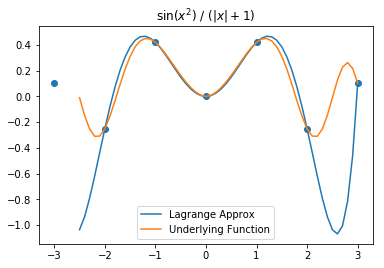

In [150]:
Xrange = np.arange(-3, 4, 1)
Xcont = np.arange(-2.5, 3.1, 0.1)

plt.title(r"$\sin(x^2) \ / \ (|x| + 1)$")
plt.scatter(Xrange, gfunc3(Xrange))
plt.plot(Xcont, lagr3(Xcont), label="Lagrange Approx")
plt.plot(Xcont, gfunc3(Xcont), label="Underlying Function")
plt.legend()
plt.show()